Authors: 

### This Jupyter Notebook file explores the ____ dataset. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Load excel file into dataframe
reales_data = pd.read_excel('real_estate_dataset/real_estate_data.xlsx')

# save df as CSV without index
reales_data.to_csv('real_estate_dataset/realest_data.csv', index=False, header=True, encoding='utf-8')

In [3]:
# 'transaction_date': X1 - The transaction date in year format (e.g., 2013.250 for March 2013)
# 'house_age': X2 - The age of the house in years
# 'nearest MRT dist.': X3 - Distance to the nearest MRT station in meters
# 'convenience_stores': X4 - Number of convenience stores within walking distance
# 'latitude': X5 - Geographic coordinate for latitude in degrees
# 'longitude': X6 - Geographic coordinate for longitude in degrees
# 'price/ping': Y - House price per unit area in 10,000 New Taiwan Dollars per Ping

# load the csv saved
real_estate_df = pd.read_csv('real_estate_dataset/realest_data.csv', index_col=False)

# rename the columns
real_estate_df.columns=['transaction_date', 'house_age', 'nearest MRT dist.', 'convenience_stores','latitude', 'longitude',
                                    'price/ping']

# display the df
real_estate_df.head()

,transaction_date,house_age,nearest MRT dist.,convenience_stores,latitude,longitude,price/ping
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
# display dataframe summary
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_date    414 non-null    float64
 1   house_age           414 non-null    float64
 2   nearest MRT dist.   414 non-null    float64
 3   convenience_stores  414 non-null    int64  
 4   latitude            414 non-null    float64
 5   longitude           414 non-null    float64
 6   price/ping          414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [5]:
# descriptive statistics for columns generated
real_estate_df.describe()

,transaction_date,house_age,nearest MRT dist.,convenience_stores,latitude,longitude,price/ping
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


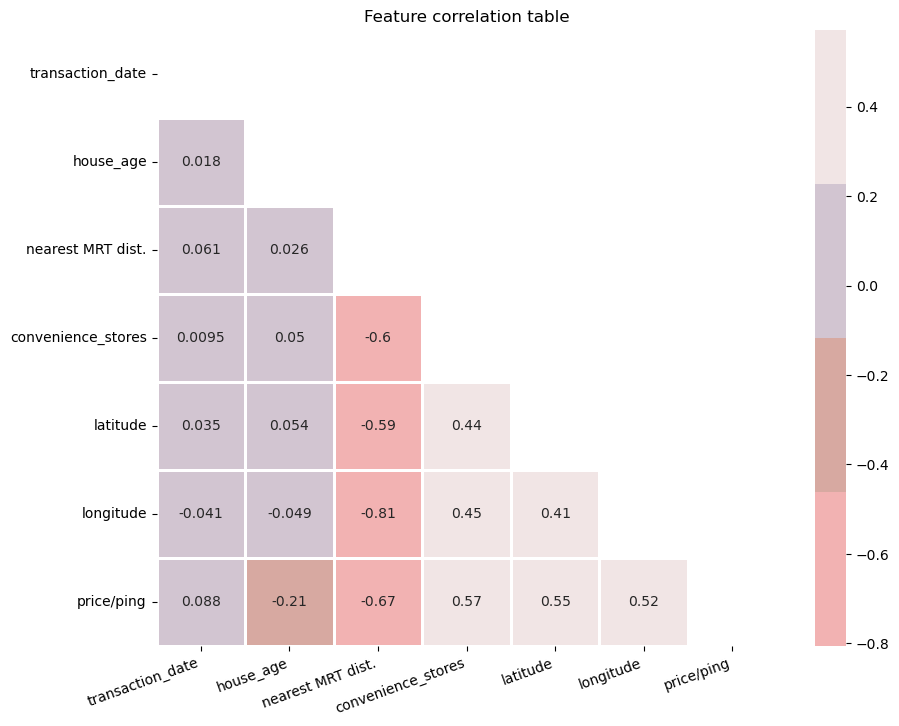

In [6]:
# compute correlation matrix
corr = real_estate_df.corr()

# boolean mask matrix same hape as corr cerated
mask = np.zeros_like(corr, dtype=bool)

# upper triangle set to true (mask-> yes)
mask[np.triu_indices_from(mask)] = True

# create a figure and axes for plotting with specific size
fig, ax = plt.subplots(figsize=(10, 8))

# set title for plot
plt.title('Feature correlation table')

# Custom color palette
cmap = sns.color_palette(["#f2b2b2", "#d7a9a1", "#d2c5d1", "#f1e5e5"])

# plot correlation matrix with mask and annotations
sns.heatmap(corr, cmap=cmap, mask=mask, ax=ax, annot=True, linewidths=1)

# y-axis labels horizontal and right aligned
plt.yticks(rotation=0, ha='right')

# x-axis labels rotated 20° and right aligned
plt.xticks(rotation=20, ha= 'right')

# display plot
plt.show()

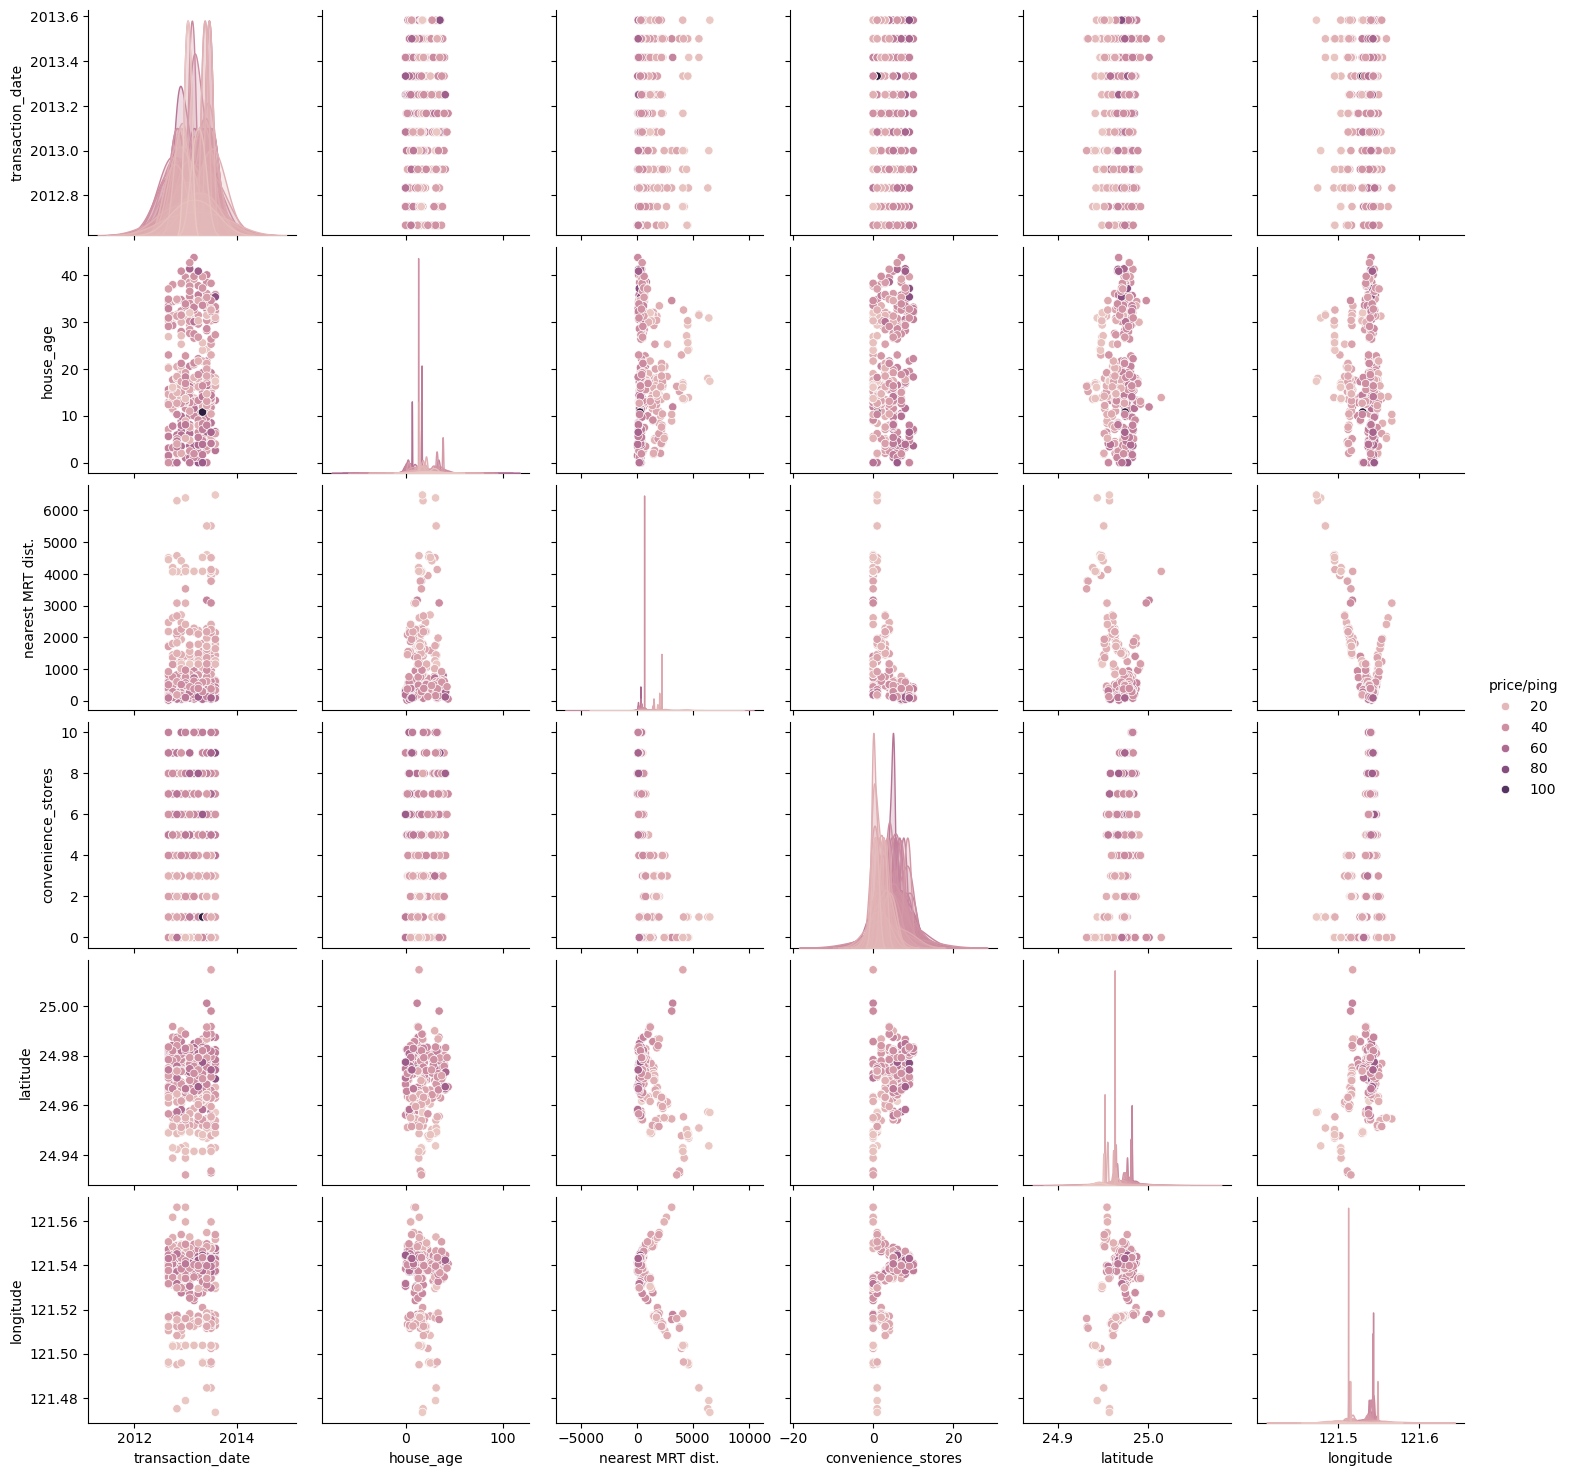

In [7]:
# create pairplots features vs price/ping
sns.pairplot(real_estate_df[list(real_estate_df.columns[:6]) + ['price/ping']], hue="price/ping")

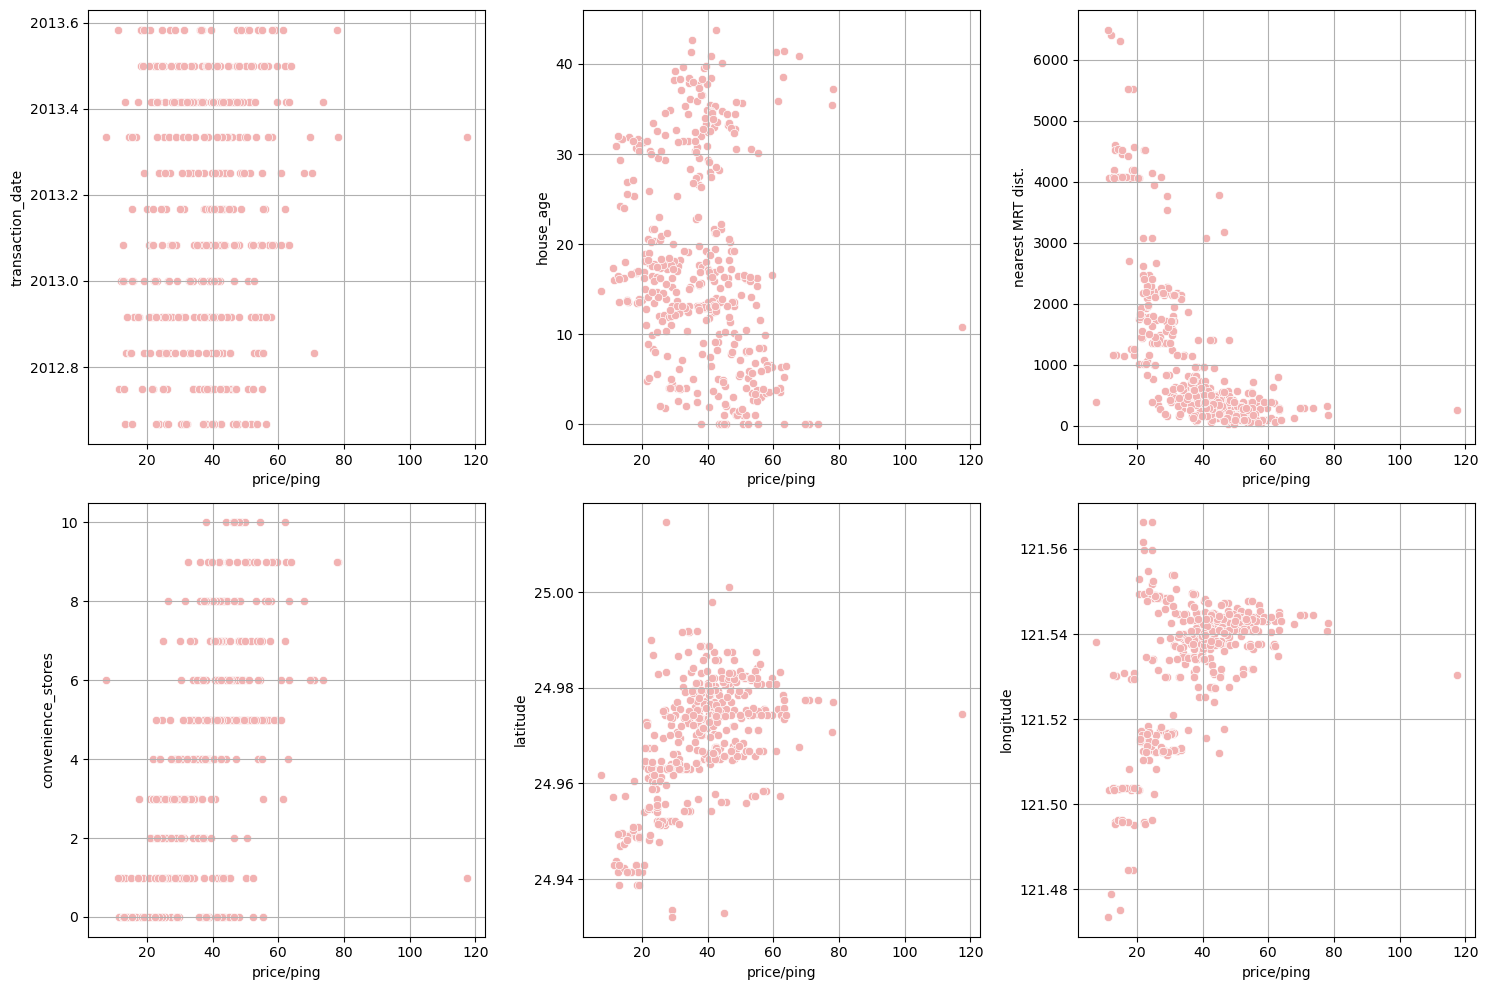

In [8]:
# select first 6 features (x1, x2, x3, x4, x5, x6)
features = real_estate_df.columns[:6]

# create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

# flatten 2d array of axes for indexing
axes=axes.flatten()

# iterate features and plot them against price
for i, feature in enumerate(features):
    sns.scatterplot(data=real_estate_df, x='price/ping', y=feature, ax=axes[i], color="#f2b2b2")
    axes[i].grid()
    axes[i].set_xlabel('price/ping')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

In [9]:
# remove the 'transaction_date' column from df
real_estate_df.drop(labels=['transaction_date'],axis=1, inplace=True)

In [10]:
import geopandas as gpd
import plotly.express as px

gdf = gpd.GeoDataFrame(real_estate_df, geometry=gpd.points_from_xy(real_estate_df['longitude'], real_estate_df['latitude']))

# Create a scatter mapbox plot
fig = px.scatter_map(gdf, 
                         lat='latitude', 
                         lon='longitude', 
                         color='price/ping', 
                         hover_name='house_age',  # Adjust to your desired hover information
                         zoom=10,
                         color_continuous_scale=px.colors.sequential.Sunsetdark)

# Update layout for the map style
fig.update_layout(map_style="basic")

# Show the plot
fig.show()

**Transaction date has least correlation so we can remove it for regression task**